<a href="https://colab.research.google.com/github/Abhishek-0899/GRIP-The-Spark-Foundation--Data-Science-Intern/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSF GRIP Task -- Business Analyst And Data Science Intern---Dec.2021**

# Author -- Abhishek Kumar Pandit
# *.........Prediction Using Supervised ML


# 1.Predict the precentage of student based on number of study hr.
# 2.What will be the predicted score of a student if he studies for 9.25hr/day? 

Import the Libraries

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Reading the Dataset

In [ ]:
df=pd.read_csv('/content/student_scores - student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# shape of a dataset i.e) rows, columns

In [ ]:
df.shape

(25, 2)

# Finding the null values in Data

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 2-D scattter plot 

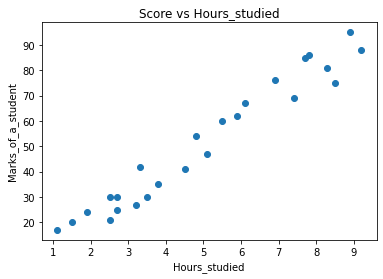

In [ ]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel("Hours_studied")
plt.ylabel('Marks_of_a_student')
plt.title('Score vs Hours_studied')
plt.show()

From the above graph we can say that if the student studies for more hr/day, he gets a good score.....  

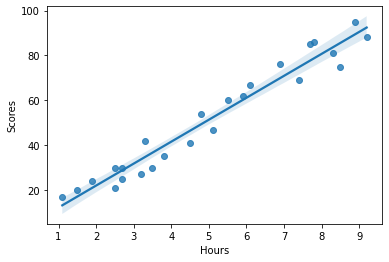

In [ ]:
sns.regplot(x=df['Hours'],y=df['Scores'])

# Separating features and target variable

In [ ]:
x=df.drop(('Scores'),axis=1)
y=df['Scores']
print('shape of x is :',x.shape)
print('shape of y is :',y.shape)

shape of x is : (25, 1)
shape of y is : (25,)


# Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Select a model and  train it

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([9.91065648])

In [ ]:
lr.intercept_

2.018160041434662

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Actual Score vs Predicted Score of a student

In [ ]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Study_hours','Student_Actual_score','Student_predicted_score'])

,Study_hours,Student_Actual_score,Student_predicted_score
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


# Data visualization of actual and predicted score

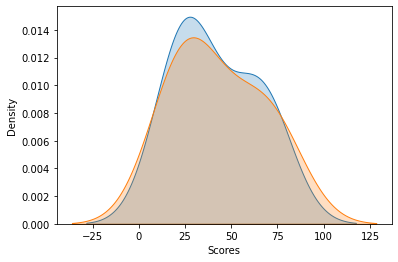

In [ ]:
sns.kdeplot(y_test,label='Original',shade=True)
sns.kdeplot(y_pred,label='Predicted',shade=True)
plt.score()
plt.show()

In [ ]:
print('Training Accuracy :',lr.score(x_train,y_train )*100)
print('Test Data Accuracy :',lr.score(x_test,y_test)*100)

Training Accuracy : 95.15510725211553
Test Data Accuracy : 94.54906892105353


# What will be the predicted score of a student if he studies for 9.25hr/day?

In [ ]:
h=9.25
c=lr.predict([[h]])
print('If the sudent studies for {} hr/day he will score {}% in test'.format(h,c))

If the sudent studies for 9.25 hr/day he will score [93.69173249]% in test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Evaluating the model

In [ ]:
from sklearn import metrics
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred))

mean_absolute_error:  4.183859899002982
